# Import and Setup

Adjust cell width to view more content

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

Import general packages and YLXPS-related packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys 
import os 
import scipy
import importlib
import datetime as dt
import pandas as pd
from scipy.optimize import curve_fit

plt.style.use('../style.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

sys.path.insert(0, '../../purity-monitor/')
sys.path.insert(0, '../analysis/')
import HelperClasses as Dataset
import StandMonitor as Monitor
import PlotFunctions as Plt

In [3]:
importlib.reload(Dataset)
importlib.reload(Monitor)
importlib.reload(Plt)

<module 'PlotFunctions' from '../analysis/PlotFunctions.py'>

# Data Read-In

In [4]:
# Sensors = []
# Files = ['C:/Data/StandStatus/20210314.h5', 'C:/Data/StandStatus/20210315.h5']
# for File in Files: 
#     Sensor = Monitor.SensorData(Filepath=File)
#     Sensor.GetData()
#     Sensors.append(Sensor)

# AllSensors = Monitor.SensorData()
# AllSensors.Combine(Sensors)
# XRange = [dt.datetime(2021,3,15,8,0), dt.datetime(2021,3,15,16,0)]
# AllSensors.PlotData(Data=AllSensors.Temp, Selection='Temperature', XTicks=120, YTicks=10, XRange=XRange, YRange=[-120,-80])
# plt.savefig('20210315_temp.png')
# AllSensors.PlotData(Data=AllSensors.SPressure, Selection='System Pressure', XTicks=120, YTicks=5, XRange=XRange, YRange=[-15,20])
# # AllSensors.PlotData(Data=AllSensors.XPressure, Selection='Xenon Pressure', XTicks=120, YTicks=100, XRange=XRange)

 | Filename... /gpfs/loomis/project/david_moore/aj487/Data_WL110/LXe_Setup/TPC/20210315/LongerSHVCable_Au-Thorslabs_C-300V_A-1800V_2.h5
 | Number of files in ch1...	 320/320
 | Number of files in ch2...	 320/320
 | Filename... /gpfs/loomis/project/david_moore/aj487/Data_WL110/LXe_Setup/TPC/20210315/LongerSHVCable_Au-Thorslabs_C-300V_A-1800V_6.h5
 | Number of files in ch1...	 130/450
 | Number of files in ch2...	 130/450
 | Filename... /gpfs/loomis/project/david_moore/aj487/Data_WL110/LXe_Setup/TPC/20210315/LongerSHVCable_Au-Thorslabs_C-300V_A-1800V_4.h5
 | Number of files in ch1...	 40/490
 | Number of files in ch2...	 40/490
 | Filename... /gpfs/loomis/project/david_moore/aj487/Data_WL110/LXe_Setup/TPC/20210315/LongerSHVCable_Au-Thorslabs_C-300V_A-1800V_1.h5
 | Number of files in ch1...	 76/566
 | Number of files in ch2...	 76/566
 | Filename... /gpfs/loomis/project/david_moore/aj487/Data_WL110/LXe_Setup/TPC/20210315/LongerSHVCable_Au-Thorslabs_C-300V_A-1800V_3.h5
 | Number of files i

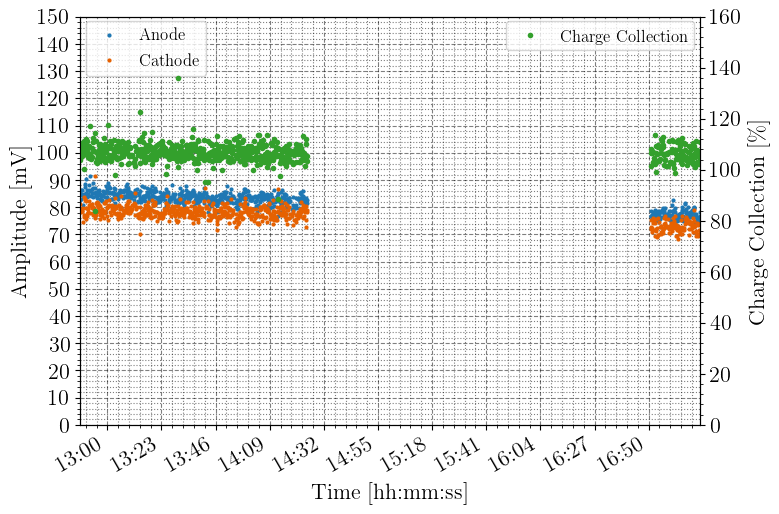

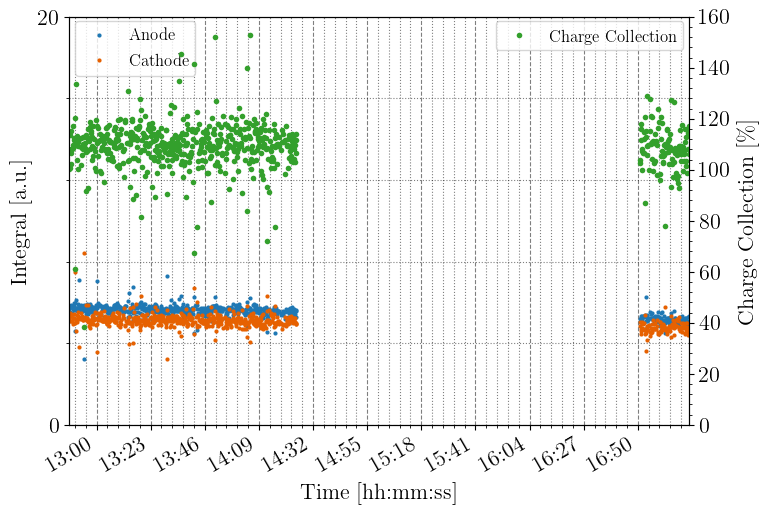

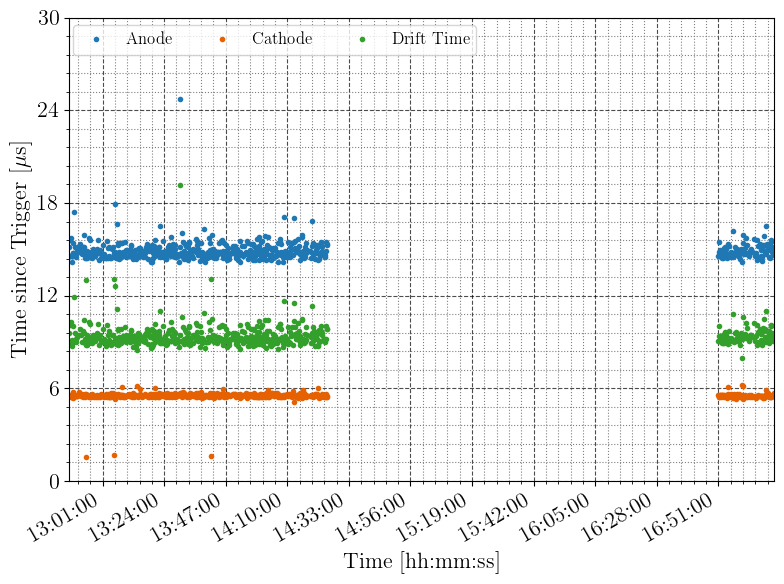

In [5]:
D1 = Dataset.Dataset(Path='/gpfs/loomis/project/david_moore/aj487/Data_WL110/LXe_Setup/TPC/20210315/', Selection='LongerSHV*')
D1.RunStandardAnalysis()
D1.ShowAmplitudeVsTime(YTicks=10, YMax=150)
D1.ShowIntegralVsTime(YTicks=20, YMax=20)
D1.ShowDrifttimeVsTime()

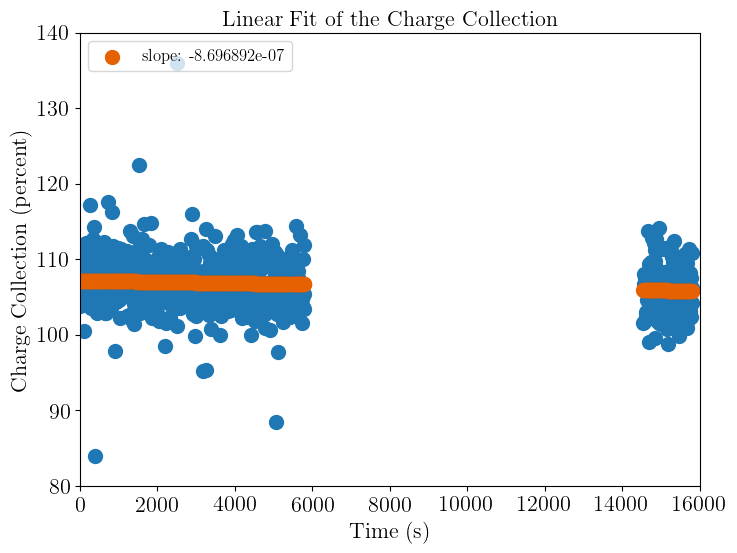

In [6]:
time = np.array([(each_time-np.min(D1.Ch[0].TimeStamp)).total_seconds() for each_time in D1.Ch[0].TimeStamp])
collection = D1.ChargeCollection

params = np.polyfit(time,collection,1)
charge_collection_fit = params[0]*time + params[1]

plt.figure()
plt.scatter(time,collection*100)
plt.scatter(time, charge_collection_fit*100, label = ('slope: {:3e}'.format(params[0])))
plt.title('Linear Fit of the Charge Collection')
plt.xlabel('Time (s)')
plt.ylabel('Charge Collection (percent)')
plt.legend()
plt.show()

400 g of Xe

In [7]:
#in us
drift_time = D1.Ch[0].DriftTime-D1.Ch[1].DriftTime
life_time = - drift_time/np.log(collection-.3)
alpha = 0.3
#in kg
M = 400/1000
#kg/liter
rho = 5.5E-3

In [8]:
def outgassing_func(t, n, R):
    return alpha / (n + (R*rho*t/M))

In [9]:
params, covs = curve_fit(outgassing_func, time, life_time/1000, p0 = [.05E-9, 3.0E-10])
params

array([8.26641276e+00, 1.52391870e-03])

In [10]:
covs

array([[ 3.72701247e-02, -2.80315737e-04],
       [-2.80315737e-04,  4.16115210e-06]])

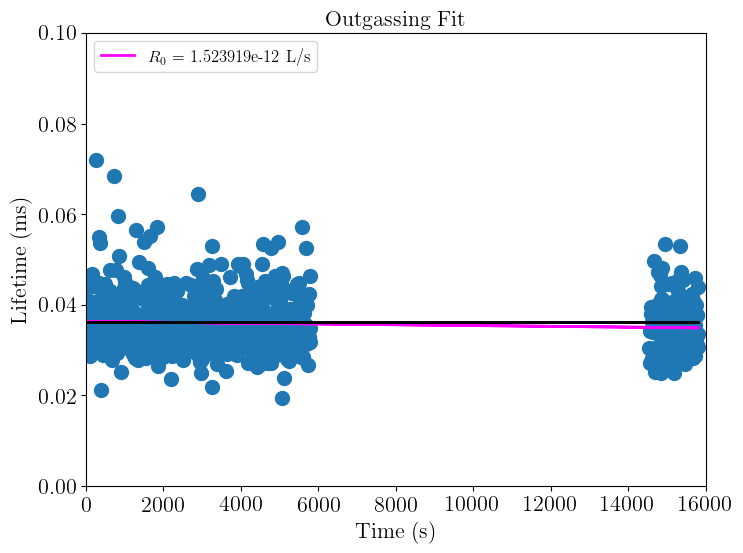

In [11]:
n, R = params[0], params[1]
outgassing_fit = alpha / (n + (R*rho*time/M))

plt.figure()

plt.scatter(time, life_time/1000)
plt.plot(time, outgassing_fit, label='$R_0$ = {:3e} L/s'.format(params[1]*10**-9), color='magenta')
plt.plot(time, [outgassing_fit[0]]*len(time), color='k')
plt.title('Outgassing Fit')
plt.xlabel('Time (s)')
plt.ylabel('Lifetime (ms)')
plt.ylim(0, 0.1)
plt.legend()
#plt.savefig('./Outgassing_Fit.png')

In [12]:
D2 = Dataset.Dataset(Path='C:/Data/20210315/', Selection='Outgassing*')
D2.RunStandardAnalysis()
D2.ShowAmplitudeVsTime(YTicks=10, YMax=150)
D2.ShowIntegralVsTime(YTicks=10, YMax=100)
# plt.savefig("20210315_cc_outgassing.png")
# D2.ShowDrifttimeVsTime()
D2.ShowBaselineNoise(BinMax=50)

 | Processing data in channel 1...


IndexError: list index out of range

In [ ]:
Plt.PltWfm(Time=D2.Ch[0].Time,
           Data=[D2.Ch[0].AmpClean[D2.Cut][0], D2.Ch[1].AmpClean[D2.Cut][0]*-1] ,
           Legend=['Anode'],
           XTicks=100,
           YTicks=20,
           SaveName='avg_waveform',
           Color='k')

In [ ]:
Plt.PltWfm(Time=D2.Ch[0].Time,
           Data=[np.mean(D2.Ch[0].AmpClean[D2.Cut], axis=0), np.mean(D2.Ch[1].AmpClean[D2.Cut]*-1, axis=0)] ,
           Legend=['Anode'],
           XTicks=100,
           YTicks=20,
           SaveName='avg_waveform',
           Color='k')
Plt.PltWfm(Time=D2.Ch[0].Time,
           Data=[np.mean(D2.Ch[0].Amp[D2.Cut], axis=0), np.mean(D2.Ch[1].Amp[D2.Cut]*-1, axis=0)] ,
           Legend=['Anode'],
           XTicks=100,
           YTicks=20,
           SaveName='avg_waveform',
           Color='k')

In [ ]:
# exo = pd.read_csv("../data/exo200_driftvelocity.csv")
# exo.head

In [ ]:
# efield = [25,35,41,50,65,80,100,115,130,150,165,180]
# vel = []
# err = []
# for field in efield:
#     D2 = Dataset.Dataset(Path='C:/Data/20210222/', Selection='*DriftVelocity_AfterFilling_Au-Thorslabs_C-%dV*' % field)
#     D2.RunStandardAnalysis()
#     DriftTime = np.mean(D2.Ch[0].DriftTime - D2.Ch[1].DriftTime )
#     DriftTimeErr = np.std(D2.Ch[0].DriftTime - D2.Ch[1].DriftTime )/np.sqrt(len(D2.Ch[0].DriftTime))
#     # DriftTime = np.mean(D2.Ch[0].DriftTime) - np.mean(D2.Ch[1].DriftTime )
#     DriftVelocity = 20.0/DriftTime
#     DriftVelocityErr = np.max([np.abs(DriftVelocity-20.0/(DriftTime+DriftTimeErr)), np.abs(DriftVelocity-20.0/(DriftTime-DriftTimeErr))])
#     print(DriftTime, DriftTimeErr)
#     # print(D2.Ch[0].GradTime - D2.Ch[1].GradTime)
#     print(DriftVelocity, DriftVelocityErr)
#     vel.append(DriftVelocity)
#     err.append(DriftVelocityErr)
#     # D2.ShowAmplitudeVsTime(YTicks=10, YMax=150)
#     # D2.ShowDrifttimeVsTime()

# fig = plt.figure(figsize=(8,6))
# plt.xlabel('Electric Field [V/cm]')
# plt.ylabel('Drift Velocity [mm/$\mu$s]')
# plt.xlim(0,800)
# plt.ylim(0,2.2)


# plt.errorbar(exo['Electric Field'], exo['Drift Velocity'], color=colors[1], marker='o', markersize=3, label='EXO-200')
# plt.errorbar(efield, vel, yerr=err, marker='o', markersize=3, capsize=4, ls='None', color=colors[0], label='Yale')

# plt.legend(loc='lower right')
# plt.show() 

In [ ]:
# D2 = Dataset.Dataset(Path='C:/Data/20210222/', Selection='*DriftVelocity_AfterFilling_Au-Thorslabs_C-*')
# D2.RunStandardAnalysis()

# D2.ShowAmplitudeVsTime(YTicks=10, YMax=150)
# plt.xlim(dt.datetime(2021,2,22,11,30), dt.datetime(2021,2,22,12,0))

# D2.ShowDrifttimeVsTime()
# plt.xlim(dt.datetime(2021,2,22,11,30), dt.datetime(2021,2,22,12,0))


In [ ]:


# D3 = Dataset.Dataset(Path='C:/Data/20210222/', Selection='*Purify*')
# D3.RunStandardAnalysis()
# D3.ShowAmplitudeVsTime(YTicks=10, YMax=100)
# # D3.ShowDrifttimeVsTime()
# print(np.mean(D3.Ch[0].DriftTime - D3.Ch[1].DriftTime))
# print(np.median(D3.ChargeCollection))
# # Plt.PltWfm(Time=D3.Ch[0].Time,
# #            Data=[np.mean(D3.Ch[0].AmpClean[D3.Cut], axis=0),np.mean(D3.Ch[1].AmpClean[D3.Cut]*-1, axis=0)] ,
# #            Legend=['Anode'],
# #            XTicks=100,
# #            YTicks=20,
# #            SaveName='avg_waveform',
# #            Color='k')
# # plt.xlim(-1000,1000)
# # plt.show()

In [ ]:
# D4 = Dataset.Dataset(Path='C:/Data/20210222/', Selection='**')
# D4.RunStandardAnalysis()
# D4.ShowAmplitudeVsTime(YTicks=10, YMax=100)

In [ ]:
# plt.figure()
# plt.hist(D3.ChargeCollection, bins=np.linspace(0,1,100))
# plt.show()

In [ ]:
# import datetime
# import matplotlib

# timestamp = ["7:00","8:15", "8:40", "8:42", "8:47", "8:49", "8:58", "9:13", "9:36", "9:49", "9:58", "10:06", "10:13", "10:23", "10:37", "11:12", "11:32", "12:17", "13:44", "17:24", "17:34", "17:38", "17:39", "17:41", "17:42", "17:45", "17:49", "17:51", "17:54", "17:59", "18:03", "18:05", "18:11", "18:16", "18:22", "18:29", "18:33", "18:40", "18:48", "18:51", "18:54", "18:57", "19:06", "19:10", "19:13", "19:20", "19:27"]
# capacitance = [298.5, 298.6, 300.7, 301.0, 301.7, 302.1, 304.0, 305.9, 307.8, 309.6, 310.4, 310.4, 310.3, 310.3, 310.4, 310.4, 310.4, 310.3, 310.3, 310.2, 310.3, 310.1, 309.9, 309.6, 309.3, 308.5, 306.6, 305.8, 305.5, 304.9, 304.3, 304.0, 302.8, 302.2, 301.6, 301.0, 300.7, 300.3, 299.0, 298.8, 298.7, 298.5, 298.5, 298.4, 298.5, 298.5, 298.5]

# timestamp = [datetime.datetime.strptime(x, "%H:%M") for x in timestamp]
# formatter = matplotlib.dates.DateFormatter('%H:%M')

# fig = plt.figure()
# ax = fig.gca()
# plt.gcf().axes[0].xaxis.set_major_formatter(formatter)
# plt.gcf().autofmt_xdate()
# plt.grid()
# plt.xlabel('Time [hh:mm]')
# plt.ylabel('Capacitance [pF]')
# plt.hlines(capacitance[0], xmin=timestamp[0], xmax=timestamp[-1], color=colors[1])
# plt.xlim(timestamp[0], timestamp[-1])

# plt.errorbar(timestamp, capacitance, yerr=0.1, capsize=5, marker='o', ms=3, lw=1)
# plt.savefig('cap_vs_time.png')
# plt.show() 
# print((np.max(capacitance)-np.min(capacitance))/6.9)
